### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn as skl




#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("charity_data.csv")
df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(["EIN", "NAME"], axis = 1)

In [3]:
df.head(1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1


In [4]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
APP_COUNTS = df["APPLICATION_TYPE"].value_counts()
APP_COUNTS

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

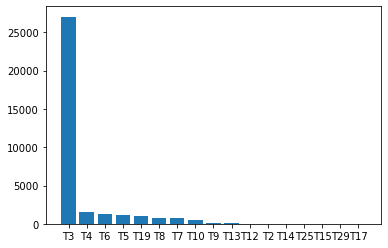

In [6]:
# Visualize the value counts of APPLICATION_TYPE

data = APP_COUNTS
plt.bar(["T3", "T4", "T6", "T5", "T19", "T8", "T7", "T10", "T9", "T13", "T12", "T2", "T14", "T25", "T15", "T29", "T17"], data)
plt.show()


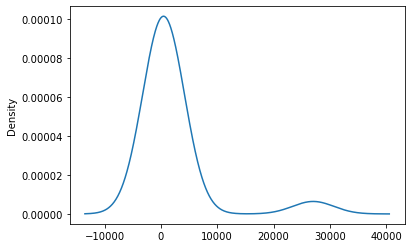

In [7]:
#create density plot to visualize value counts to determine where the cut off is for grouping

APP_COUNTS.plot.density()

In [8]:
# Look at APPLICATION_TYPE value counts for binning
APP_COUNTS = df["APPLICATION_TYPE"].value_counts()
APP_COUNTS

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:

# Determine which values to replace if counts are less than ...
replace_apps = list(APP_COUNTS[APP_COUNTS<500].index)
replace_apps

# Replace in dataframe
for app in replace_apps:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
CLASS_COUNTS = df["CLASSIFICATION"].value_counts()
CLASS_COUNTS.tail(50)

C7120    18
C1500    16
C1800    15
C6000    15
C1250    14
C8200    11
C1278    10
C1238    10
C1237     9
C1235     9
C7210     7
C2400     6
C1720     6
C4100     6
C1257     5
C1600     5
C0        3
C2710     3
C1260     3
C3200     2
C1256     2
C1267     2
C1246     2
C1234     2
C1900     1
C2190     1
C4500     1
C2570     1
C2500     1
C1283     1
C1236     1
C1820     1
C2561     1
C8210     1
C4120     1
C2170     1
C2150     1
C1728     1
C1732     1
C4200     1
C5200     1
C3700     1
C1245     1
C2380     1
C1370     1
C1570     1
C1248     1
C1580     1
C6100     1
C2600     1
Name: CLASSIFICATION, dtype: int64

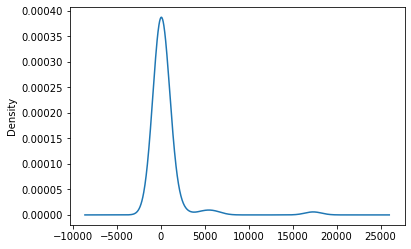

In [11]:
# Visualize the value counts of CLASSIFICATION
CLASS_COUNTS.plot.density()

In [12]:
# Determine which values to replace if counts are less than 300 ..?

replace_class = list(CLASS_COUNTS[CLASS_COUNTS<100].index)
replace_class

# Replace in dataframe
for cls in replace_class:
    df["CLASSIFICATION"] = df["CLASSIFICATION"].replace(cls,"Other")
    
# Check to make sure binning was successful
df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [13]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes =="object"].index.tolist()
df_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()



,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


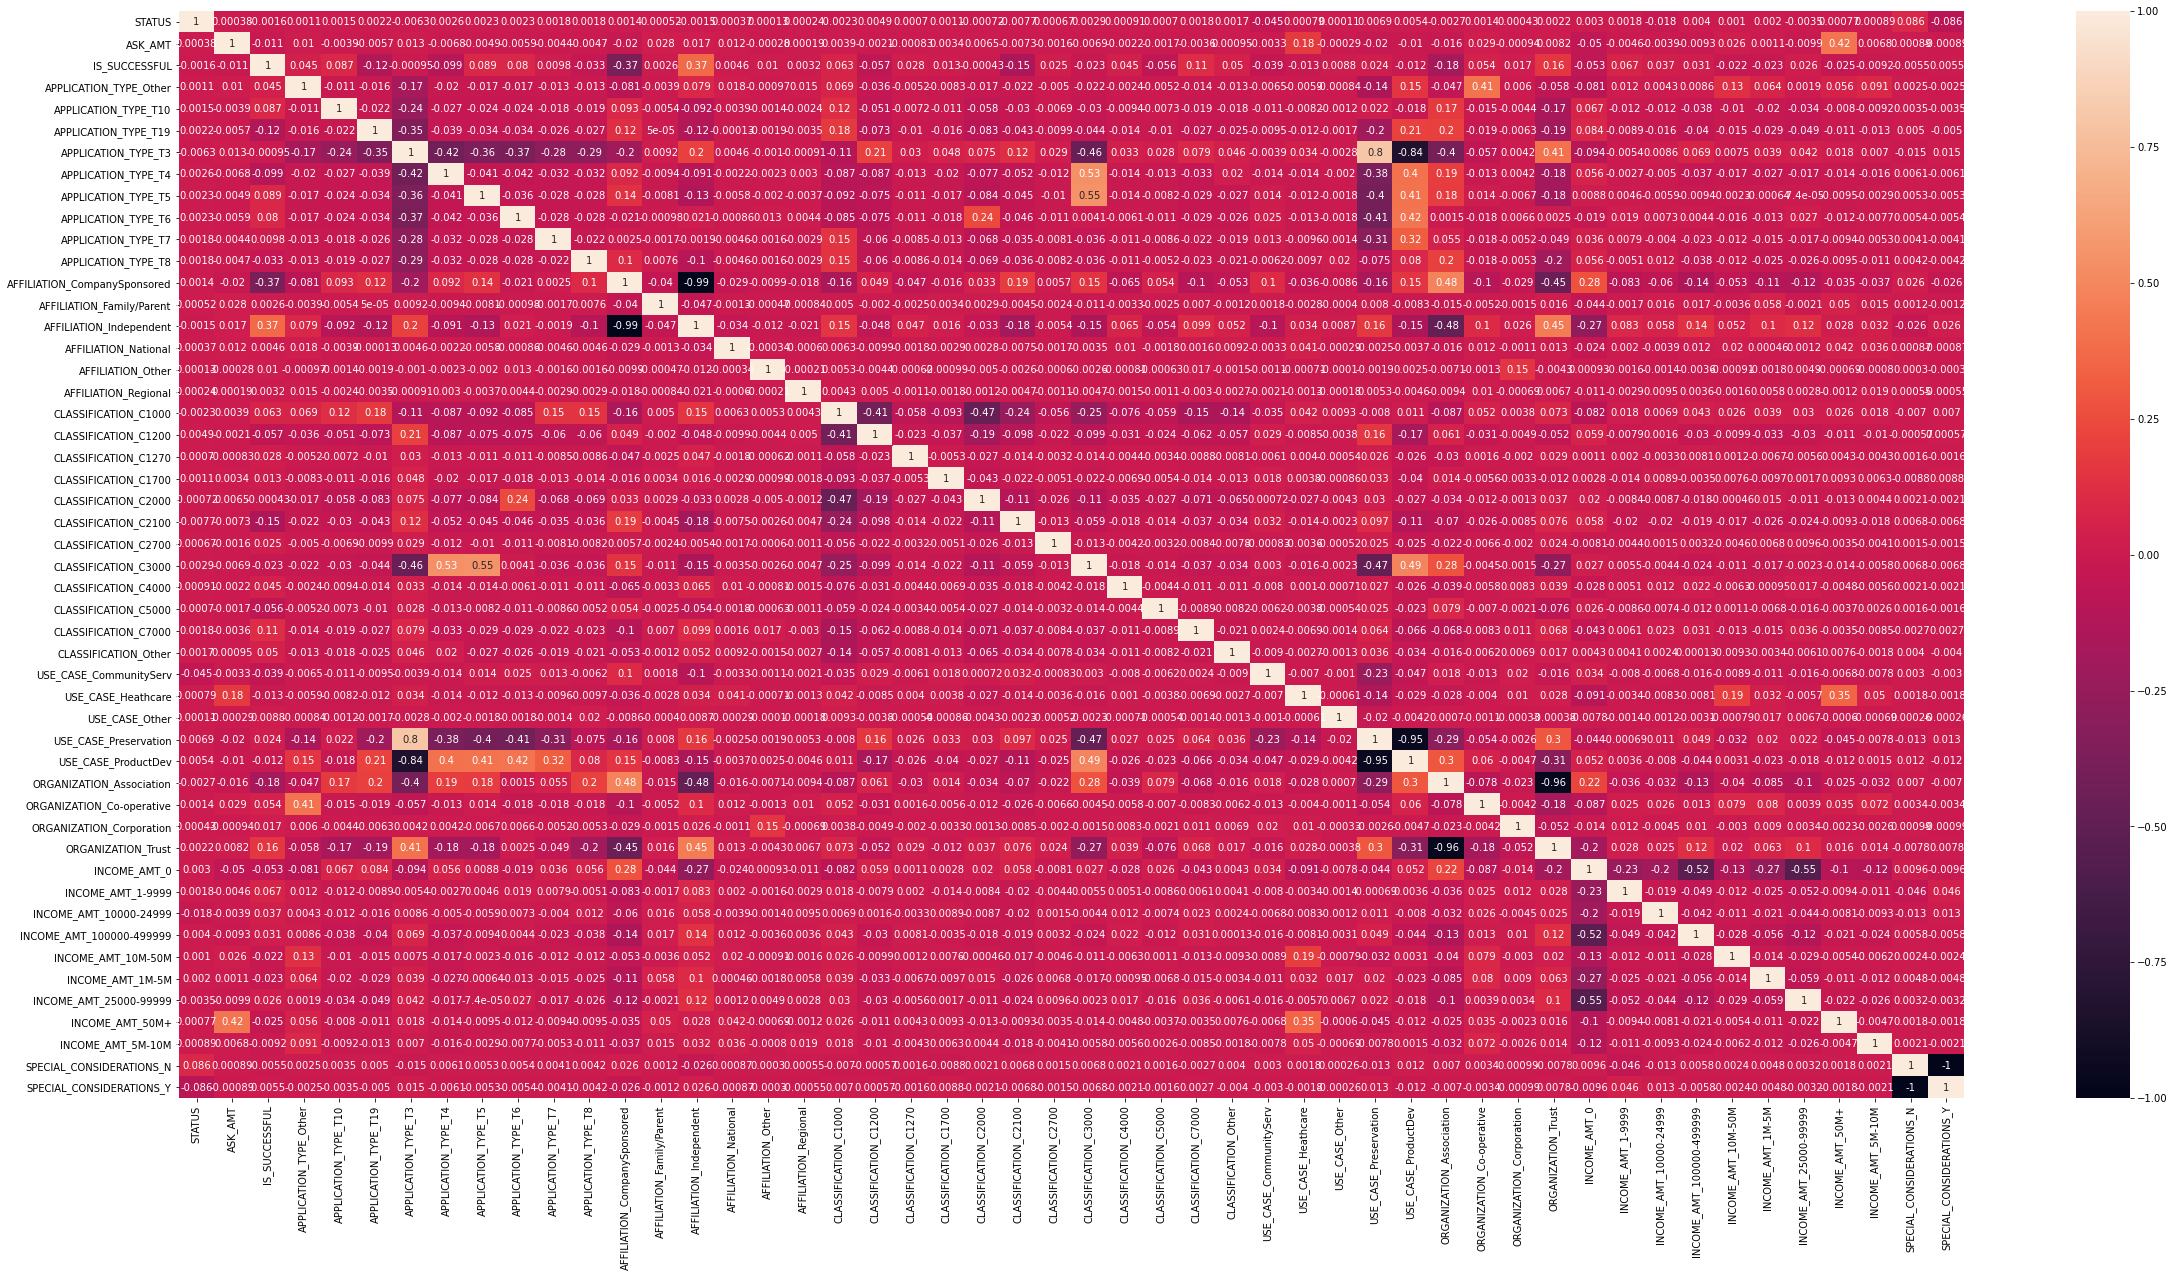

In [16]:
corrMatrix = df.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corrMatrix, annot=True)

plt.show()

In [17]:
# Split our preprocessed data into our features and target arrays
y = df["IS_SUCCESSFUL"]
X = df.drop(["IS_SUCCESSFUL"], axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, 
                             activation="relu"))

# Second. third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="swish"))
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="swish"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#checkpoints are for non having to re-run the model every time or storing results somewhere
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])


# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.summary()

Epoch 1/100
804/804 [==============================] - 1s 917us/step - loss: 0.6182 - accuracy: 0.6757
Epoch 2/100
172/804 [=====>........................] - ETA: 0s - loss: 0.5640 - accuracy: 0.7185
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 966us/step - loss: 0.5580 - accuracy: 0.72710s - loss: 0.5618 
Epoch 3/100
358/804 [============>.................] - ETA: 0s - loss: 0.5511 - accuracy: 0.7311
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 916us/step - loss: 0.5517 - accuracy: 0.7315
Epoch 4/100
570/804 [====================>.........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7335
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5485 - accuracy: 0.7330
Epoch 5/100
782/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7378
Epoch 00005: saving model to checkpoints\weight

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5514 - accuracy: 0.7252
Loss: 0.5513747334480286, Accuracy: 0.7252478003501892


In [22]:
#for savings, sharing, exporting the final model, use HDF5 format - this is about 10x the size of the checkpoint file
#so generally only save final results to this one for sharing purposes

# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

Look @ Shap Plot to determine relative feature importance
